In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

data=fetch_california_housing()

MedInc          - MedInc        median income in block group
HouseAge        - HouseAge      median house age in block group
AveRooms        - AveRooms      average number of rooms per household
AveBedrms       - AveBedrms     average number of bedrooms per household
Population      - Population    block group population
AveOccup        - AveOccup      average number of household members
Latitude        - Latitude      block group latitude
Longitude       - Longitude     block group longitude


In [3]:
# To view all features and target as a DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

<Figure size 800x600 with 0 Axes>

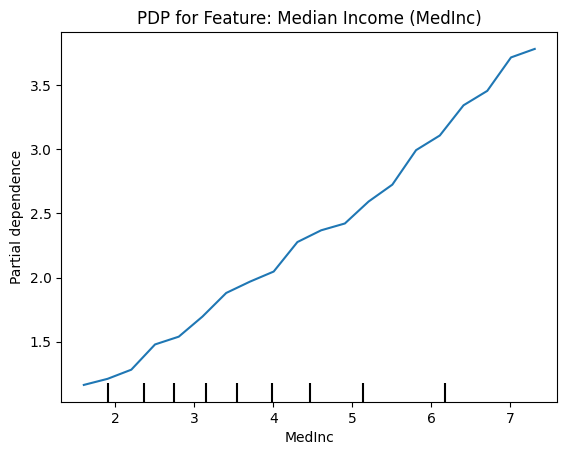

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting a random forest regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

#Use of PDP Visualization
#If we want to see how square footage affects price
#PD plot will show how price changes as we increase square footage while keeping other factors constant.

#PDP for a single feature
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model,X_train,['MedInc'],grid_resolution=20)
plt.title("1D PDP for (MedInc)")
plt.show()

<Figure size 800x600 with 0 Axes>

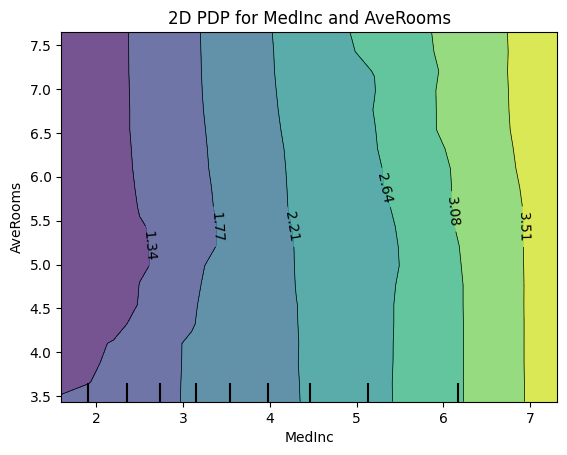

In [8]:
#PDP for 2 features
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_train, [("MedInc", "AveRooms")], grid_resolution=20)
plt.title("2D PDP for MedInc and AveRooms")
plt.show()

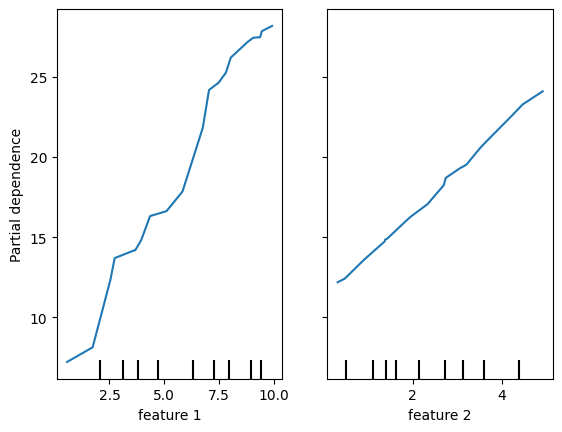

In [1]:
#Using a simple PDP Plot for feature importance on a RF model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay


X=pd.DataFrame(
    {'feature 1':np.random.rand(100)*10,
     'feature 2':np.random.rand(100)*5,
    }
)
y=2 * X['feature 1'] + 3 * X['feature 2'] + np.random.randn(100)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

model=RandomForestRegressor(n_estimators=50,random_state=42)
model.fit(X_train,y_train)

# Step 4: Plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features=['feature 1', 'feature 2'])
plt.show()